In [968]:
import pandas as pd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler


In [969]:
bioclim = pd.read_csv('data/csv/bioclim.csv')
bioclim = bioclim.drop(columns=['Unnamed: 0'])

In [970]:
crta_coords_filtered = pd.read_csv('data/csv/crta_coords_filtered.csv')
crta_coords_filtered.columns = ['lat', 'lon']
bioclim = pd.merge(bioclim, crta_coords_filtered, on=['lat', 'lon'])
bioclim = bioclim.drop_duplicates(subset=['lat', 'lon'])
bioclim = bioclim[bioclim['bio_13']!=-3.4e+38]
bioclim = bioclim[bioclim['elev']> 0]
bioclim['elev'] = np.log(bioclim['elev'] + 1)
coords = bioclim[['lat', 'lon']]
bioclim = bioclim.drop(columns=['lat', 'lon'])
# bioclim['group'] = 'osmia'

In [971]:
america = pd.read_csv('data/csv/10k_america_bioclim_ndvi.csv', index_col=None)
america = america.drop(columns=['Unnamed: 0'])
america = america[america['bio_13']!= -3.4e+38]
america = america[america['elev']> 0]
america['elev'] = np.log(america['elev'] + 1) 
america_points = america[['lat', 'lon']]
america = america.drop(columns=['lat', 'lon'])
# america['group'] = 'america'
column_order = bioclim.columns.tolist()
america = america[column_order]

In [972]:
bio_columns = [col for col in america.columns if col.startswith('bio_')]
other_columns = [col for col in america.columns if not col.startswith('bio_')]
bio_columns_sorted = sorted(bio_columns, key=lambda x: (x.split('_')[0], int(x.split('_')[1])))
other_columns_sorted = sorted(other_columns)
sorted_columns = bio_columns_sorted + other_columns_sorted
america = america[sorted_columns]
osmia = bioclim[sorted_columns]

In [973]:
# # NO MEAN SUBTRACT
# america_df = america.copy()
# osmia_df = osmia.copy()

In [974]:
# MEAN SUBTRACT ONLY

america_means = america.mean()
america_df = america - america_means

osmia_means = osmia.mean()
osmia_df = osmia - osmia_means

In [975]:
# # NORMALIZE
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(osmia)

# osmia_df = pd.DataFrame(scaler.transform(osmia), columns=osmia.columns)
# america_df = pd.DataFrame(scaler.transform(america), columns=osmia.columns)

In [976]:
osmia_df.describe()

,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,bio_9,bio_10,...,bio_12,bio_13,bio_14,bio_15,bio_16,bio_17,bio_18,bio_19,elev,ndvi
count,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,...,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03,6.075000e+03
mean,1.136868e-15,9.590865e-16,1.412898e-15,-1.377342e-14,1.047977e-15,-1.309972e-16,-1.646822e-15,4.678471e-16,5.239887e-16,-2.339235e-16,...,-5.030292e-14,5.239887e-15,-1.721677e-15,-4.491332e-16,-1.137804e-14,-3.593065e-15,5.539309e-15,-7.186131e-15,2.853867e-16,8.772133e-18
std,1.356123e+00,8.996958e-01,2.355533e+00,7.567841e+01,1.938135e+00,1.876418e+00,2.535589e+00,5.250783e+00,4.892664e+00,1.560124e+00,...,1.578782e+02,1.963377e+01,1.209719e+01,8.645285e+00,5.425828e+01,3.739339e+01,5.713284e+01,4.688670e+01,1.323140e+00,6.789583e-02
min,-1.063885e+01,-3.195167e+00,-1.048704e+01,-2.609251e+02,-1.399192e+01,-1.005114e+01,-9.440773e+00,-1.419949e+01,-1.239168e+01,-1.193309e+01,...,-4.464069e+02,-4.339177e+01,-4.528658e+01,-1.089613e+01,-1.199040e+02,-1.483345e+02,-2.065021e+02,-1.152788e+02,-3.931381e+00,-3.126063e-01
25%,-6.846879e-01,-5.868341e-01,-1.247048e+00,-5.769744e+01,-1.091918e+00,-1.051144e+00,-1.940774e+00,-5.482826e+00,-2.375018e+00,-9.164225e-01,...,-1.064069e+02,-1.139177e+01,-6.286584e+00,-5.592302e+00,-3.190403e+01,-2.133449e+01,-2.450206e+01,-2.827885e+01,-7.743804e-01,-3.851156e-02
50%,-1.096879e-01,-1.368347e-01,-1.557777e-01,-9.076007e+00,-4.919177e-01,1.488560e-01,-3.407737e-01,2.750507e+00,-5.416845e-01,-3.664225e-01,...,-2.406914e+00,-5.391770e+00,-2.865844e-01,-3.158063e+00,-1.290403e+01,1.665514e+00,-8.502058e+00,3.721152e+00,2.430065e-01,7.184381e-03
75%,4.069791e-01,3.881663e-01,1.209202e+00,4.097339e+01,8.080823e-01,1.198856e+00,1.359225e+00,4.200507e+00,1.916488e-01,5.752440e-01,...,6.159309e+01,6.608230e+00,6.713416e+00,3.053042e+00,1.509597e+01,1.866551e+01,1.349794e+01,1.972115e+01,9.399924e-01,4.695080e-02
max,8.077812e+00,5.521499e+00,1.283730e+01,5.374979e+02,1.030808e+01,8.948856e+00,1.535923e+01,8.867174e+00,1.914165e+01,7.416912e+00,...,1.146593e+03,1.496082e+02,8.271342e+01,7.026809e+01,3.340960e+02,2.736655e+02,3.394979e+02,3.777212e+02,3.191486e+00,2.040423e-01


In [977]:
from sklearn.decomposition import PCA
pca = PCA(n_components=osmia_df.shape[1]) 
pca_result = pca.fit_transform(osmia_df)
 

In [978]:
osmia_pca = pd.DataFrame(pca_result)
osmia_pca

new_column_names = [f"PC{i+1}" for i in range(osmia_pca.shape[1])]
osmia_pca.columns = new_column_names

In [979]:
america_pca = pca.transform(america_df)
america_pca = pd.DataFrame(america_pca)
america_pca.columns = new_column_names

In [980]:
america_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21
0,-639.490758,-494.382905,-233.195007,98.635636,21.770933,-9.067975,-25.697721,-20.857839,-27.788107,39.075645,...,3.096346,4.908133,1.555675,-4.343243,0.171498,0.551518,-1.060421,0.232166,0.198236,-3.824683e-07
1,-480.003149,-401.838399,-280.582719,147.272711,53.522025,-22.008180,-26.610359,-32.290206,-32.306908,45.923668,...,-1.317901,7.137536,0.611527,-5.340359,-0.900678,0.273938,-1.003598,0.064567,0.021324,-3.627651e-07
2,4.969080,-313.563087,-380.480478,317.385658,60.933898,-75.551696,-27.988519,-21.680638,-25.086479,26.402408,...,-5.874415,-10.869905,0.276032,-5.192839,0.749687,0.166816,-0.527000,0.174893,-0.262277,-7.638640e-07
3,364.098620,-290.480573,-519.576952,386.680724,115.245966,-72.847511,-34.262736,-30.718440,-30.480231,15.528529,...,-9.547233,-24.433993,-5.360903,-0.678544,0.508681,-0.220520,-0.003024,0.159900,-0.172263,6.458222e-08
4,788.213654,-322.960370,-574.445597,419.787855,160.211857,-52.631999,-26.090829,-33.031742,-18.959005,0.009017,...,0.766173,-28.377334,-6.718897,-0.942758,0.180460,-0.407065,1.084720,0.015235,-0.015457,2.020399e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6530,43.891027,320.959689,114.798696,-90.587704,-2.423334,0.970992,22.852184,6.690035,19.839193,-12.680673,...,7.379893,9.008922,4.601110,0.380695,1.014998,-0.250142,1.590284,-0.199312,0.572680,-1.823083e-06
6531,56.596893,285.953944,90.595841,-99.303743,4.623594,-1.998220,20.519419,2.016315,21.000062,-11.597122,...,6.031118,8.317431,4.069098,0.717790,1.259859,-0.045148,1.673738,-0.370898,0.501787,-1.030125e-07
6532,113.756129,306.615633,113.764391,-99.832287,-1.360425,-4.567968,20.917418,5.316686,19.429851,-11.391129,...,7.160067,8.302971,4.776016,0.579634,0.850239,-0.173090,1.505917,-0.164248,0.555330,-9.604742e-08
6533,135.257112,225.488849,81.028326,-104.337717,1.379800,-3.941773,18.808853,2.444386,21.992267,-10.399547,...,5.564919,9.043708,4.105962,0.622279,1.532700,0.062061,1.302131,-0.385695,0.532370,-1.659807e-07


Text(0.5, 1.0, 'PCA Loadings Heatmap')

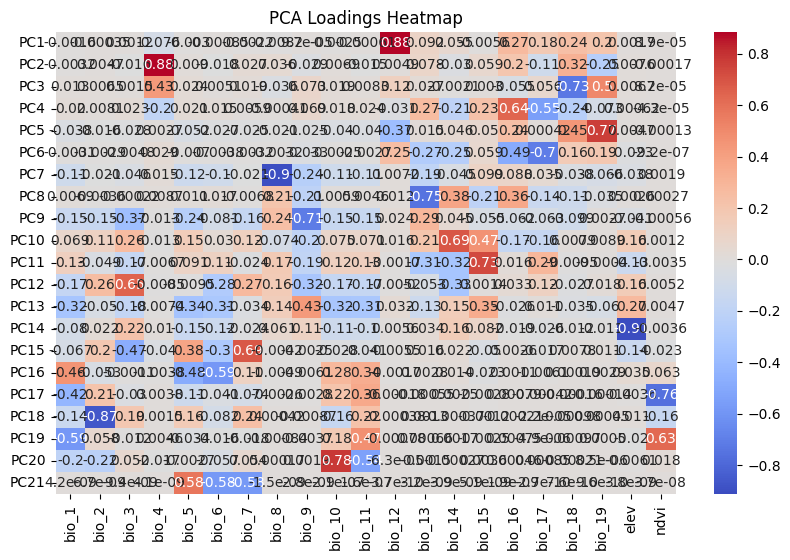

In [981]:
import seaborn as sns

loadings = pca.components_
# print("Explained Variance Ratio:", pca.explained_variance_ratio_)
# print("Total explained variance:", pca.explained_variance_ratio_.sum())
loadings_df = pd.DataFrame(loadings, columns=osmia_df.columns, index=[f'PC{i+1}' for i in range(loadings.shape[0])])
plt.figure(figsize=(10, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm')
plt.title('PCA Loadings Heatmap')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 [Text(0, 0.5, 'PC1'),
  Text(0, 1.5, 'PC2'),
  Text(0, 2.5, 'PC3'),
  Text(0, 3.5, 'PC4'),
  Text(0, 4.5, 'PC5'),
  Text(0, 5.5, 'PC6'),
  Text(0, 6.5, 'PC7'),
  Text(0, 7.5, 'PC8'),
  Text(0, 8.5, 'PC9'),
  Text(0, 9.5, 'PC10'),
  Text(0, 10.5, 'PC11'),
  Text(0, 11.5, 'PC12'),
  Text(0, 12.5, 'PC13'),
  Text(0, 13.5, 'PC14'),
  Text(0, 14.5, 'PC15'),
  Text(0, 15.5, 'PC16'),
  Text(0, 16.5, 'PC17'),
  Text(0, 17.5, 'PC18'),
  Text(0, 18.5, 'PC19'),
  Text(0, 19.5, 'PC20'),
  Text(0, 20.5, 'PC21')])

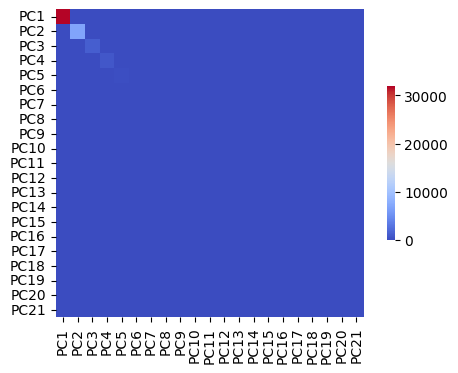

In [995]:
# cov_reduced = osmia_pca.cov()

# plt.figure(figsize=(6,4))  
# sns.heatmap(cov_reduced, annot=False, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})
# plt.yticks(rotation=0, ha='right')

In [982]:
# pca.explained_variance_

In [983]:
from scipy.linalg import eigh

correlation_matrix = osmia_df.corr()

eigenvalues, eigenvectors = eigh(correlation_matrix)

eigenvalues = eigenvalues[::-1]
eigenvectors = eigenvectors[:, ::-1]

print('EIGENVALUES\n')
for i, value in enumerate(eigenvalues, start=1):
    print(f"PC{i}: {round(value,2)}")

EIGENVALUES

PC1: 6.45
PC2: 5.57
PC3: 3.9
PC4: 1.33
PC5: 1.08
PC6: 0.78
PC7: 0.75
PC8: 0.58
PC9: 0.29
PC10: 0.12
PC11: 0.05
PC12: 0.04
PC13: 0.02
PC14: 0.02
PC15: 0.01
PC16: 0.01
PC17: 0.01
PC18: 0.0
PC19: 0.0
PC20: 0.0
PC21: 0.0


In [984]:
print('VARIANCE EXPLAINED\n')
for i, value in enumerate(pca.explained_variance_ratio_, start=1):
    print(f"PC{i}: {round(value*100,2)}")

VARIANCE EXPLAINED

PC1: 77.47
PC2: 16.67
PC3: 3.12
PC4: 2.07
PC5: 0.42
PC6: 0.13
PC7: 0.04
PC8: 0.03
PC9: 0.02
PC10: 0.01
PC11: 0.01
PC12: 0.01
PC13: 0.01
PC14: 0.0
PC15: 0.0
PC16: 0.0
PC17: 0.0
PC18: 0.0
PC19: 0.0
PC20: 0.0
PC21: 0.0


In [985]:
keep_cols = osmia_pca.columns[:3]
osmia_reduced = osmia_pca[keep_cols]
america_reduced = america_pca[keep_cols]

In [986]:
america_reduced

,PC1,PC2,PC3
0,-639.490758,-494.382905,-233.195007
1,-480.003149,-401.838399,-280.582719
2,4.969080,-313.563087,-380.480478
3,364.098620,-290.480573,-519.576952
4,788.213654,-322.960370,-574.445597
...,...,...,...
6530,43.891027,320.959689,114.798696
6531,56.596893,285.953944,90.595841
6532,113.756129,306.615633,113.764391
6533,135.257112,225.488849,81.028326


In [987]:
from scipy.spatial import distance

osmia_mean = osmia_reduced.mean()
osmia_cov = osmia_reduced.cov()

def mahalanobis_distance(x, mean, cov):
    x_minus_mu = x - mean
    cov_inv = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, cov_inv)
    mahal = np.dot(left_term, x_minus_mu.T)
    return np.sqrt(mahal)

mahal_distances = america_reduced.apply(lambda x: mahalanobis_distance(x, osmia_mean, osmia_cov), axis=1)

In [988]:
from scipy.stats import chi2

degrees_freedom = osmia_df.shape[1]
chi_sq = 1 - chi2.cdf(mahal_distances, degrees_freedom)

(array([2.130e+02, 1.266e+03, 2.069e+03, 1.713e+03, 6.990e+02, 1.790e+02,
        1.140e+02, 9.200e+01, 5.700e+01, 4.000e+01, 3.700e+01, 1.700e+01,
        1.500e+01, 5.000e+00, 3.000e+00, 6.000e+00, 5.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00]),
 array([ 0.22929159,  1.53477802,  2.84026446,  4.14575089,  5.45123732,
         6.75672375,  8.06221019,  9.36769662, 10.67318305, 11.97866949,
        13.28415592, 14.58964235, 15.89512878, 17.20061522, 18.50610165,
        19.81158808, 21.11707451, 22.42256095, 23.72804738, 25.03353381,
        26.33902024]),
 <BarContainer object of 20 artists>)

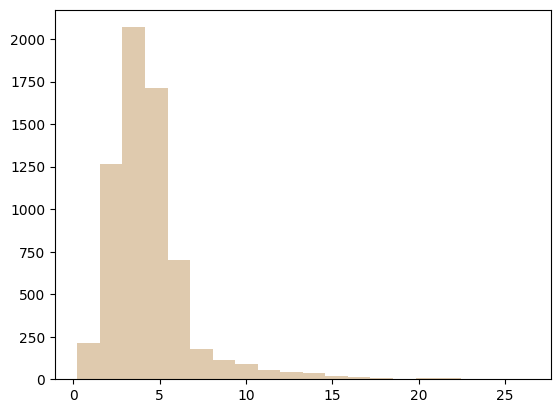

In [989]:
plt.hist(mahal_distances, bins=20, alpha=0.7, color='tan')

(array([1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 3.000e+00,
        3.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 4.000e+00,
        6.000e+00, 6.000e+00, 8.000e+00, 1.300e+01, 1.600e+01, 3.700e+01,
        5.900e+01, 6.367e+03]),
 array([0.19381608, 0.23412527, 0.27443447, 0.31474366, 0.35505286,
        0.39536206, 0.43567125, 0.47598045, 0.51628965, 0.55659884,
        0.59690804, 0.63721723, 0.67752643, 0.71783563, 0.75814482,
        0.79845402, 0.83876322, 0.87907241, 0.91938161, 0.9596908 ,
        1.        ]),
 <BarContainer object of 20 artists>)

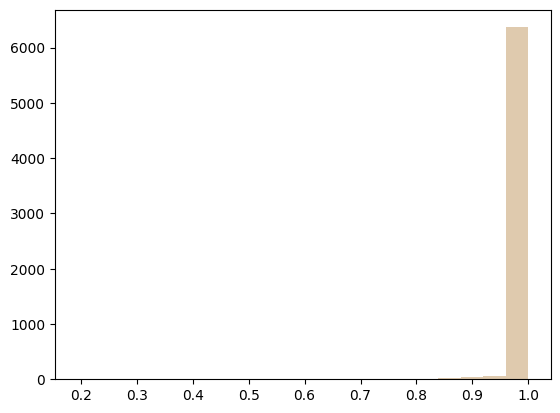

In [990]:
plt.hist(chi_sq, bins=20, alpha=0.7, color='tan')

In [991]:
america_points = america_points.reset_index(drop=True)
america_points['dist'] = mahal_distances
america_points['chi'] = chi_sq

(-14641852.624039328, -6841695.90415462, 2746944.401339209, 7307496.882081329)

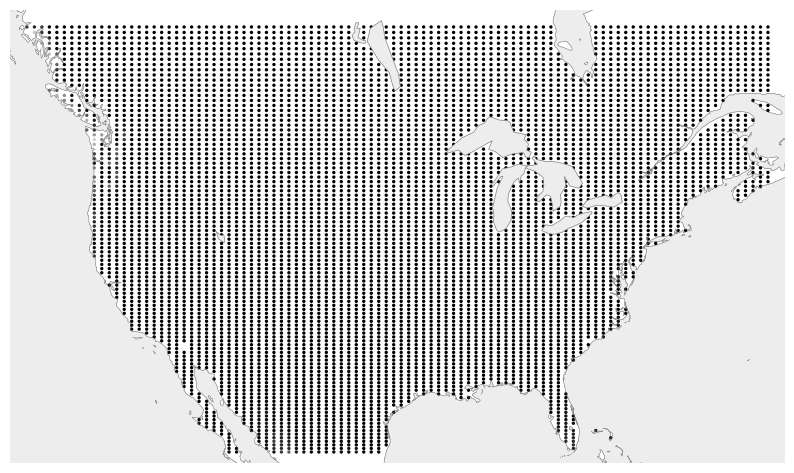

In [994]:
import geopandas as gpd
from shapely.geometry import Point
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from rasterio.warp import calculate_default_transform, reproject, Resampling
import matplotlib.pyplot as plt

extent = [-131.53, -61.46, 24.09, 54.90]
map_projection = ccrs.Mercator() 
great_lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='110m')
shapefile_path = 'data/shapefiles/ne_110m_land/ne_110m_land.shp'
gdf = gpd.read_file(shapefile_path)
lakes_shapefile_path = 'data/shapefiles/ne_110m_lakes/ne_110m_lakes.shp'
lakes_gdf = gpd.read_file(lakes_shapefile_path)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': map_projection})
ax.set_extent(extent, crs=ccrs.PlateCarree()) 
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(great_lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

ax.scatter(america_points['lon'], america_points['lat'], transform=ccrs.PlateCarree(), 
           c=america_points['chi'], cmap='Greys', vmin=0, vmax =1, s=2)

ax.axis('off')

In [993]:
))

SyntaxError: unmatched ')' (840618910.py, line 1)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(osmia)

# osmia_scaled = pd.DataFrame(scaler.transform(osmia), columns=osmia.columns)
# america_scaled = pd.DataFrame(scaler.transform(america), columns=osmia.columns)

In [ ]:
# plt.figure(figsize=(10, 5 * len(osmia_df.columns)))

# for i, column in enumerate(osmia_df.columns):
#     plt.subplot(len(osmia_df.columns), 1, i + 1)
#     osmia_df[column].hist(bins=20)
#     plt.title(f'Histogram of {column}')
# plt.tight_layout()
# plt.savefig('figures/histograms/mahal_notscaled_data_distributions.png', format='png', dpi=300)

In [ ]:
# combined = pd.concat([bioclim, america], ignore_index=True)
# combined_points = pd.concat([coords, america_points])

In [ ]:
# combined.describe()

In [ ]:
# combined_vars = combined.drop(columns=['group'])
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(combined_vars)
# combined_scaled = pd.DataFrame(df_scaled, columns=combined_vars.columns)
# combined_scaled['group'] = combined['group']

In [ ]:
# america_df = combined_scaled[combined_scaled['group'] == 'america'].drop('group', axis=1)
# osmia_df = combined_scaled[combined_scaled['group'] == 'osmia'].drop('group', axis=1)

In [ ]:
from scipy.spatial import distance
from scipy.stats import chi2

osmia_mean = osmia_df.mean()
osmia_cov = osmia_df.cov()

def mahalanobis_distance(x, mean, cov):
    x_minus_mu = x - mean
    cov_inv = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, cov_inv)
    mahal = np.dot(left_term, x_minus_mu.T)
    return np.sqrt(mahal)

mahal_distances = america_df.apply(lambda x: mahalanobis_distance(x, osmia_mean, osmia_cov), axis=1)

In [ ]:
mahal_distances = mahal_distances.reset_index(drop=True)

In [ ]:
from scipy.stats import chi2

degrees_freedom = osmia_df.shape[1]
chi_sq = 1 - chi2.cdf(mahal_distances, degrees_freedom)

In [ ]:
chi_sq

array([0.00464298, 0.00176063, 0.0372035 , ..., 0.00802643, 0.01009329,
       0.00954558])

In [ ]:
mahal_distances_eur = osmia_df.apply(lambda x: mahalanobis_distance(x, osmia_mean, osmia_cov), axis=1)

Text(0.5, 1.0, 'distribution of mahal distances, america to eur')

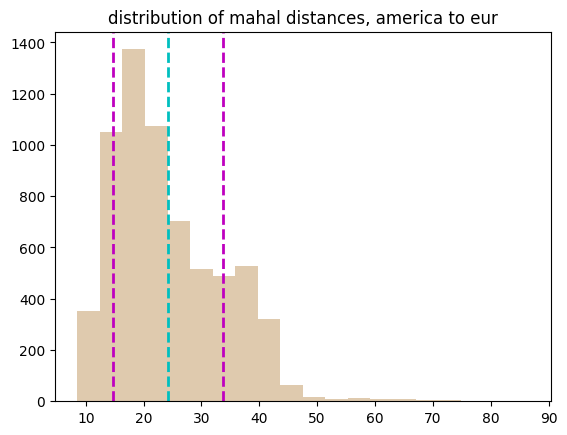

In [ ]:
# mean = np.mean(mahal_distances)
# std_dev = np.std(mahal_distances)

# plt.hist(mahal_distances, bins=20, alpha=0.7, color='tan')
# plt.axvline(mean, color='c', linestyle='dashed', linewidth=2, label='Mean')
# plt.axvline(mean + std_dev, color='m', linestyle='dashed', linewidth=2, label='+1 STD')
# plt.axvline(mean - std_dev, color='m', linestyle='dashed', linewidth=2, label='-1 STD')
# plt.title('distribution of mahal distances, america to eur')


(array([1378.,  370.,  293.,  260.,  204.,  233.,  214.,  244.,  260.,
         252.,  254.,  278.,  271.,  298.,  296.,  254.,  317.,  319.,
         277.,  263.]),
 array([6.45016596e-10, 4.96163211e-02, 9.92326416e-02, 1.48848962e-01,
        1.98465283e-01, 2.48081603e-01, 2.97697924e-01, 3.47314244e-01,
        3.96930565e-01, 4.46546885e-01, 4.96163206e-01, 5.45779526e-01,
        5.95395847e-01, 6.45012167e-01, 6.94628488e-01, 7.44244808e-01,
        7.93861129e-01, 8.43477449e-01, 8.93093770e-01, 9.42710090e-01,
        9.92326411e-01]),
 <BarContainer object of 20 artists>)

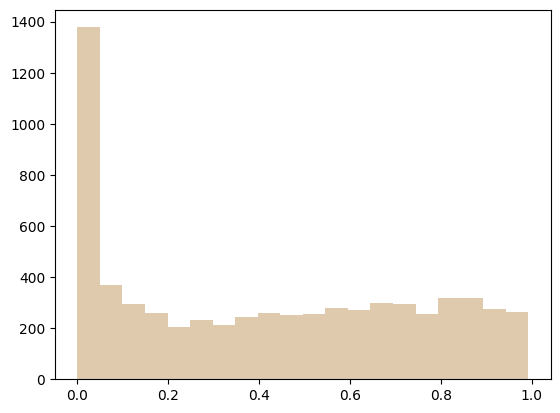

In [ ]:
plt.hist(chi_sq, bins=20, alpha=0.7, color='tan')

Text(0.5, 1.0, 'distribution of mahal distances, eur to eur')

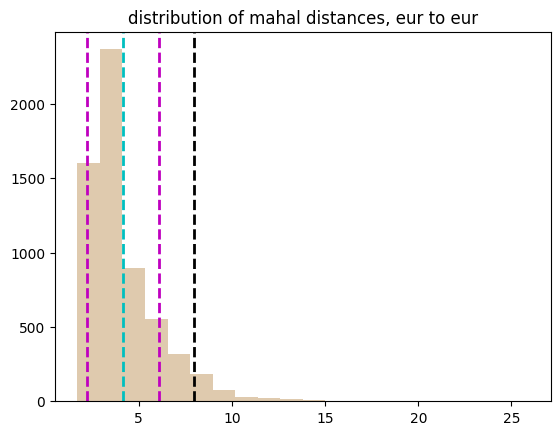

In [ ]:
# mean = np.mean(mahal_distances_eur)
# std_dev = np.std(mahal_distances_eur)
# z = 1.96
# upper_bound = mean + z * std_dev

# plt.hist(mahal_distances_eur, bins=20, alpha=0.7, color='tan')
# plt.axvline(mean, color='c', linestyle='dashed', linewidth=2, label='Mean')
# plt.axvline(mean + std_dev, color='m', linestyle='dashed', linewidth=2, label='+1 STD')
# plt.axvline(mean - std_dev, color='m', linestyle='dashed', linewidth=2, label='-1 STD')
# plt.axvline(upper_bound, color='k', linestyle='dashed', linewidth=2, label='-1 STD')
# plt.title('distribution of mahal distances, eur to eur')


In [ ]:
# upper_bound

7.949998762549315

In [ ]:
# min(mahal_distances)

8.551353278057952

In [ ]:
america_points = america_points.reset_index(drop=True)
america_points['dist'] = mahal_distances
america_points['chi'] = chi_sq
# america_points.to_csv('america_points_mahal.csv')

In [ ]:
crta_coords_filtered = crta_coords_filtered.reset_index(drop=True)
mahal_distances_eur = mahal_distances_eur.reset_index(drop=True)

crta_coords_filtered['dist'] = mahal_distances_eur

(-14641852.624039328, -6841695.90415462, 2746944.401339209, 7307496.882081329)

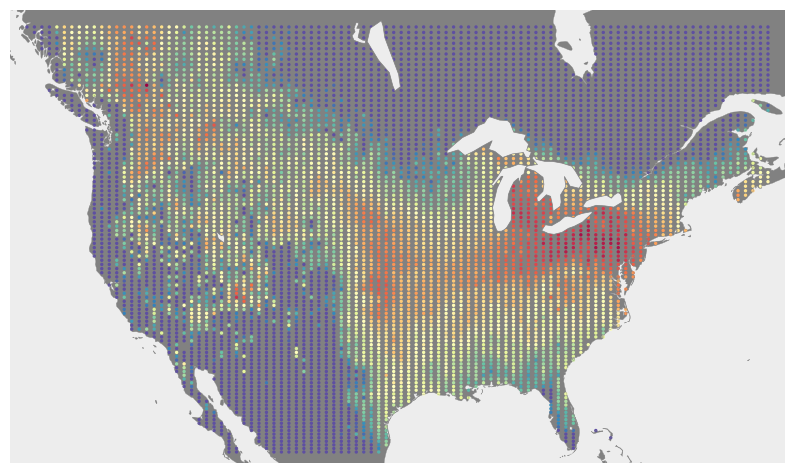

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from rasterio.warp import calculate_default_transform, reproject, Resampling
import matplotlib.pyplot as plt

extent = [-131.53, -61.46, 24.09, 54.90]
map_projection = ccrs.Mercator() 
great_lakes = cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='110m')
shapefile_path = 'data/shapefiles/ne_110m_land/ne_110m_land.shp'
gdf = gpd.read_file(shapefile_path)
lakes_shapefile_path = 'data/shapefiles/ne_110m_lakes/ne_110m_lakes.shp'
lakes_gdf = gpd.read_file(lakes_shapefile_path)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': map_projection})
ax.set_extent(extent, crs=ccrs.PlateCarree()) 
ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(great_lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

ax.scatter(america_points['lon'], america_points['lat'], transform=ccrs.PlateCarree(), 
           c=america_points['dist'], cmap='Spectral', vmin=min(mahal_distances), vmax = max(mahal_distances_eur), s=2)

ax.axis('off')



(-14641852.624039328, -6841695.90415462, 2746944.401339209, 7307496.882081329)

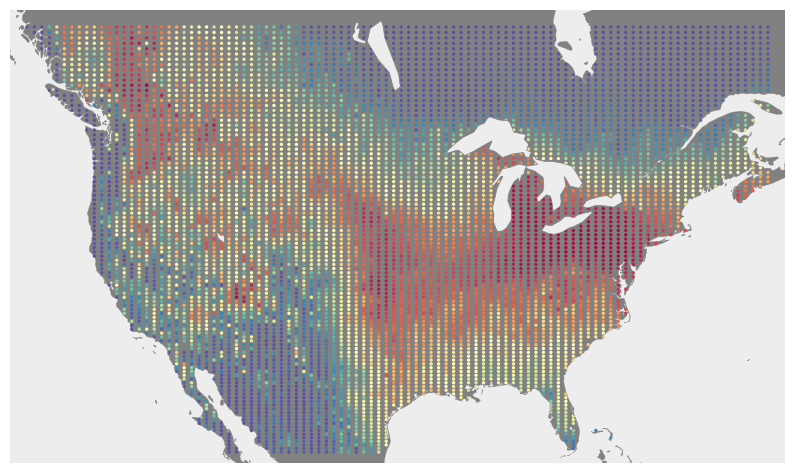

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': map_projection})
ax.set_extent(extent, crs=ccrs.PlateCarree()) 
ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
ax.add_feature(great_lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

ax.scatter(america_points['lon'], america_points['lat'], transform=ccrs.PlateCarree(), 
           c=america_points['chi'], cmap='Spectral_r', vmin=0, vmax =1, s=2)

ax.axis('off')

In [ ]:
# crta_coords_filtered

In [ ]:
# plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# ax = plt.gca()

# ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
# ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
# ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
# ax.add_feature(great_lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

# ax.scatter(crta_coords_filtered['lon'], crta_coords_filtered['lat'], transform=ccrs.PlateCarree(), 
#            c=crta_coords_filtered['dist'], s=2, cmap='Spectral', vmin=2, vmax = 8)
# ax.axis('off')

# plt.savefig('eur_mahal.png', format='png', dpi=300)

In [ ]:
# cities = {
#     "Amsterdam": (52.3676, 4.9041),
#     "Brussels": (50.8503, 4.3517),
# }

# plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})
# ax = plt.gca()

# extent = [2, 8, 49, 53]

# ax.set_extent(extent, crs=ccrs.PlateCarree())  # Adjust as needed
# ax.add_feature(cfeature.LAND, facecolor='#818181', edgecolor='gray', linewidth=.5)
# ax.add_feature(cfeature.COASTLINE, linewidth=.2, edgecolor='gray')
# ax.add_feature(cfeature.OCEAN, facecolor='#ededed', linewidth=.1, zorder=1, edgecolor='gray')
# ax.add_feature(great_lakes, facecolor='#ededed', linewidth=.5, edgecolor='gray')

# ax.scatter(crta_coords_filtered['lon'], crta_coords_filtered['lat'], transform=ccrs.PlateCarree(), 
#            c=crta_coords_filtered['dist'], s=2, cmap='Spectral', vmin=2, vmax = 8)
# ax.axis('off')


# for city, (lat, lon) in cities.items():
#     ax.plot(lon, lat, 'o', markersize=1, color='k', transform=ccrs.Geodetic())
#     ax.text(lon + .01, lat + 0, city, transform=ccrs.Geodetic())
